## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from pprint import pprint

#To view all the columns
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [2]:
# Load both train & test dataset 
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
#Lets see how many rows and columns each dataset has
print('Train dataset has {} rows and columns'.format(train.shape))
print('Test dataset has {} rows and columns'.format(test.shape))

Train dataset has (1460, 81) rows and columns
Test dataset has (1459, 80) rows and columns


In [5]:
# Top 5 rows of train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Top 5 rows of test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# Statistical information of numeric features of train dataset
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


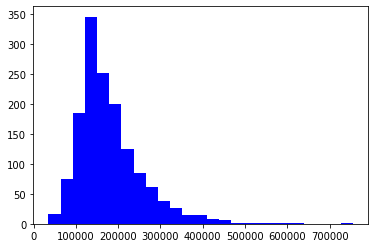

In [9]:
# target variable
plt.hist(train.SalePrice,color='blue',bins=25)
plt.show()
#The data is skewed, hence to normalise it we will use log.

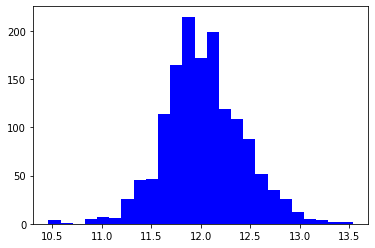

In [10]:
# log of y variable 
targets=np.log(train.SalePrice)
plt.hist(targets,color='blue',bins=25)
plt.show()

In [11]:
# Numeric features
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [12]:
#Categorical features
categorical_features=train.select_dtypes(exclude=[np.number])
categorical_features.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


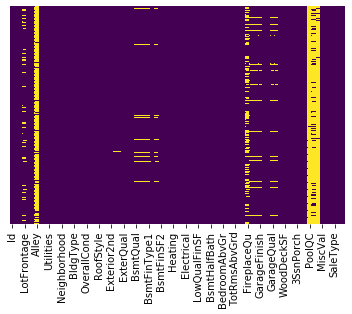

In [13]:
#Null values in the train dataset
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Percentage of missing values in a train dataset
null_values=[features for features in train if train[features].isnull().sum() > 0 ]
for features in null_values:
    print(features,np.round(train[features].isnull().mean()*100,2),'% missing values')

LotFrontage 17.74 % missing values
Alley 93.77 % missing values
MasVnrType 0.55 % missing values
MasVnrArea 0.55 % missing values
BsmtQual 2.53 % missing values
BsmtCond 2.53 % missing values
BsmtExposure 2.6 % missing values
BsmtFinType1 2.53 % missing values
BsmtFinType2 2.6 % missing values
Electrical 0.07 % missing values
FireplaceQu 47.26 % missing values
GarageType 5.55 % missing values
GarageYrBlt 5.55 % missing values
GarageFinish 5.55 % missing values
GarageQual 5.55 % missing values
GarageCond 5.55 % missing values
PoolQC 99.52 % missing values
Fence 80.75 % missing values
MiscFeature 96.3 % missing values


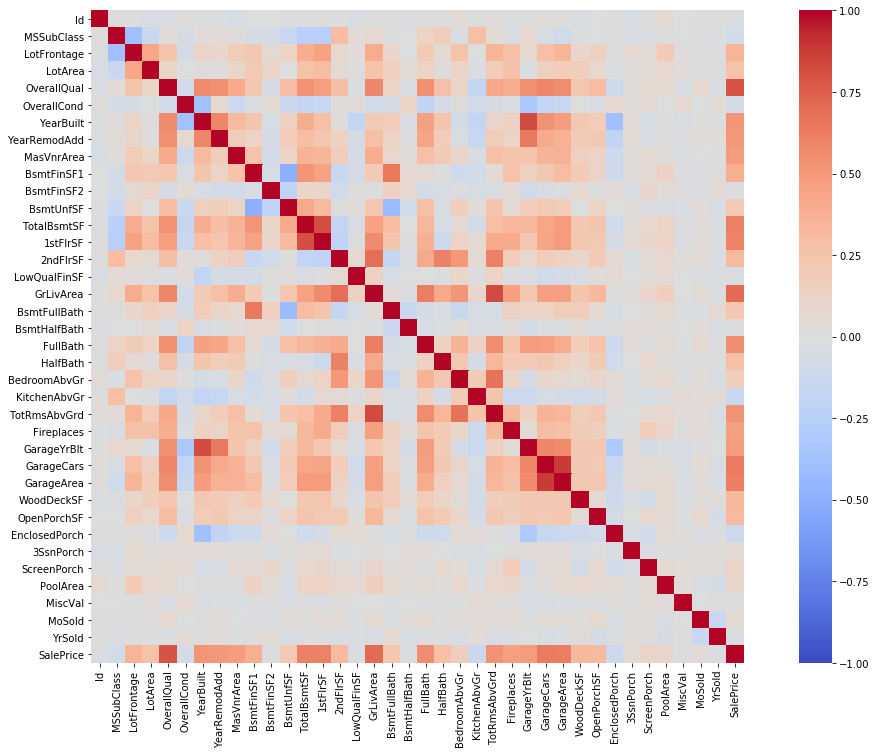

In [15]:
#Correlation
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), square=True,cmap='coolwarm',vmin=-1,vmax=1,center=0);

### Correlated features
* GarageYrBlt and Yearbuilt
* TotRmsAbvgrd and GrLivArea
* GarageArea and GarageCars
* OverallQual and Saleprice
* 1stFlrSF and TotalBsmtSF

## Analysing discrete numeric variables

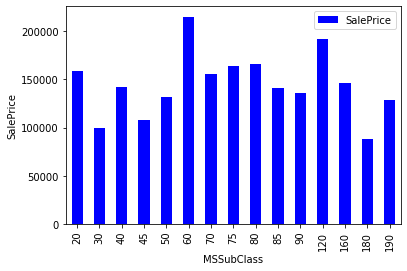

In [16]:
#MSSubClass vs SalePrice 
Mssub_pivot = train.pivot_table(index='MSSubClass', values='SalePrice', aggfunc=np.median)
Mssub_pivot.plot(kind='bar',color='blue')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.show()

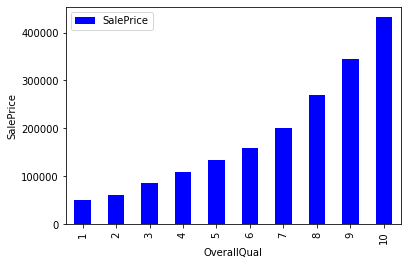

In [17]:
#Quality vs SalePrice - High correlation
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()
# As OverallQual increases Houseprices also increases

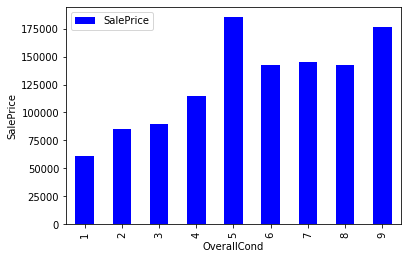

In [18]:
#OverallCond vs SalePrice - Not much correlation
cond_pivot = train.pivot_table(index='OverallCond', values='SalePrice', aggfunc=np.median)
cond_pivot.plot(kind='bar',color='blue')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.show()

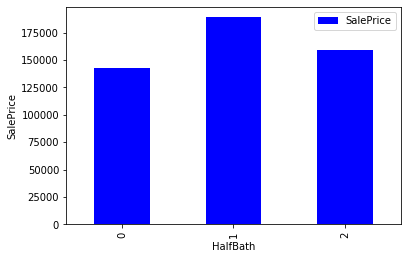

In [19]:
#HalfBath vs SalePrice
halfbath_pivot = train.pivot_table(index='HalfBath', values='SalePrice', aggfunc=np.median)
halfbath_pivot.plot(kind='bar',color='blue')
plt.xlabel('HalfBath')
plt.ylabel('SalePrice')
plt.show()

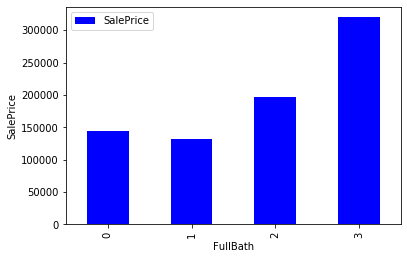

In [20]:
#FullBath vs SalePrice
fullbath_pivot = train.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.median)
fullbath_pivot.plot(kind='bar',color='blue')
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.show()

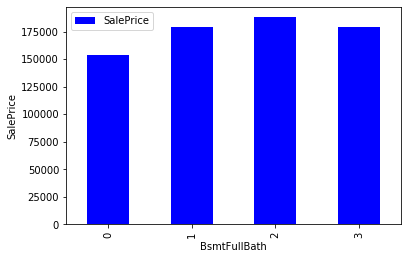

In [21]:
#BsmtFullBath vs SalePrice
BsmtFullBath_pivot = train.pivot_table(index='BsmtFullBath', values='SalePrice', aggfunc=np.median)
BsmtFullBath_pivot.plot(kind='bar',color='blue')
plt.xlabel('BsmtFullBath')
plt.ylabel('SalePrice')
plt.show()

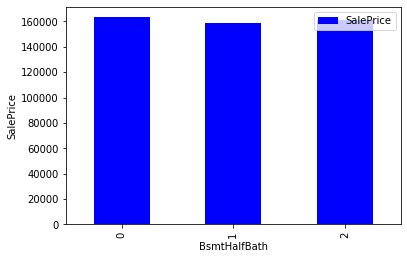

In [22]:
#BsmtHalfBath vs SalePrice
BsmtHalfBath_pivot = train.pivot_table(index='BsmtHalfBath', values='SalePrice', aggfunc=np.median)
BsmtHalfBath_pivot.plot(kind='bar',color='blue')
plt.xlabel('BsmtHalfBath')
plt.ylabel('SalePrice')
plt.show()

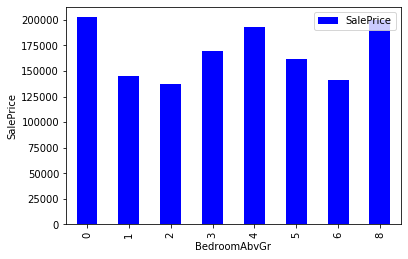

In [23]:
#BedroomAbvGr vs SalesPrice
BedroomAbvGr_pivot = train.pivot_table(index='BedroomAbvGr', values='SalePrice', aggfunc=np.median)
BedroomAbvGr_pivot.plot(kind='bar',color='blue')
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.show()

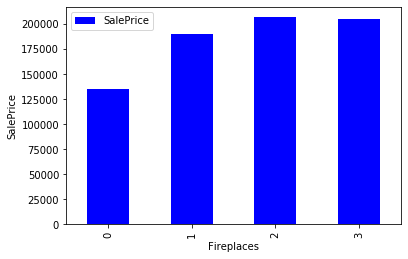

In [24]:
#Fireplaces vs SalePrice
Fireplaces_pivot = train.pivot_table(index='Fireplaces', values='SalePrice', aggfunc=np.median)
Fireplaces_pivot.plot(kind='bar',color='blue')
plt.xlabel('Fireplaces')
plt.ylabel('SalePrice')
plt.show()

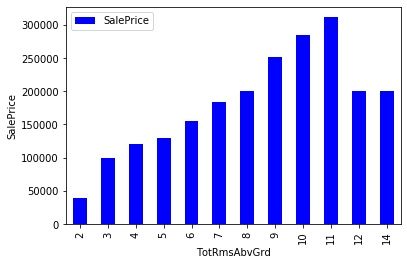

In [25]:
#TotRmsAbvGrd vs SalePrice
TotRmsAbvGrd_pivot = train.pivot_table(index='TotRmsAbvGrd', values='SalePrice', aggfunc=np.median)
TotRmsAbvGrd_pivot.plot(kind='bar',color='blue')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.show()

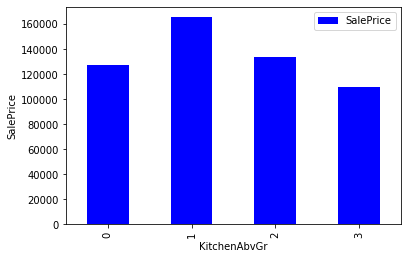

In [26]:
#KitchenAbvGr vs SalePrice
KitchenAbvGr_pivot = train.pivot_table(index='KitchenAbvGr', values='SalePrice', aggfunc=np.median)
KitchenAbvGr_pivot.plot(kind='bar',color='blue')
plt.xlabel('KitchenAbvGr')
plt.ylabel('SalePrice')
plt.show()

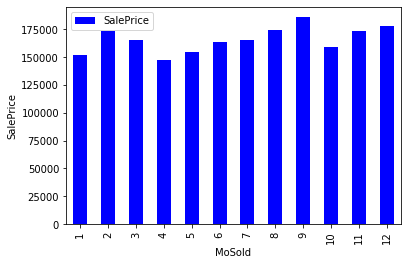

In [27]:
#MoSold vs SalePrice
Mosold_pivot = train.pivot_table(index='MoSold', values='SalePrice', aggfunc=np.median)
Mosold_pivot.plot(kind='bar',color='blue')
plt.xlabel('MoSold')
plt.ylabel('SalePrice')
plt.show()

## Analysing continuous numeric variables

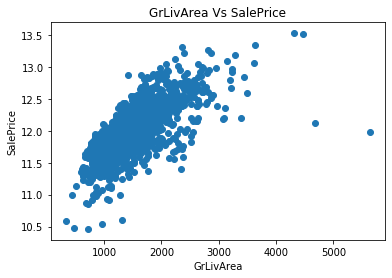

In [28]:
#GrLivArea Vs SalePrice
plt.scatter(x=train['GrLivArea'],y=targets)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea Vs SalePrice')
plt.show()

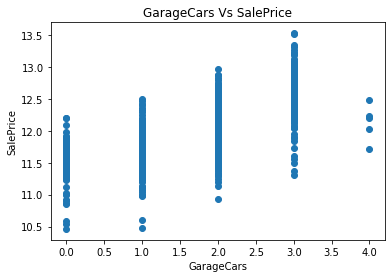

In [29]:
#GarageCars vs SalePrice
plt.scatter(x=train['GarageCars'],y=targets)
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.title('GarageCars Vs SalePrice')
plt.show()

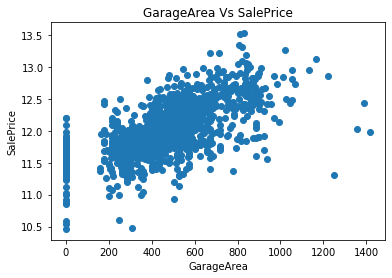

In [30]:
#GarageArea vs SalePrice
plt.scatter(x=train['GarageArea'],y=targets)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('GarageArea Vs SalePrice')
plt.show()

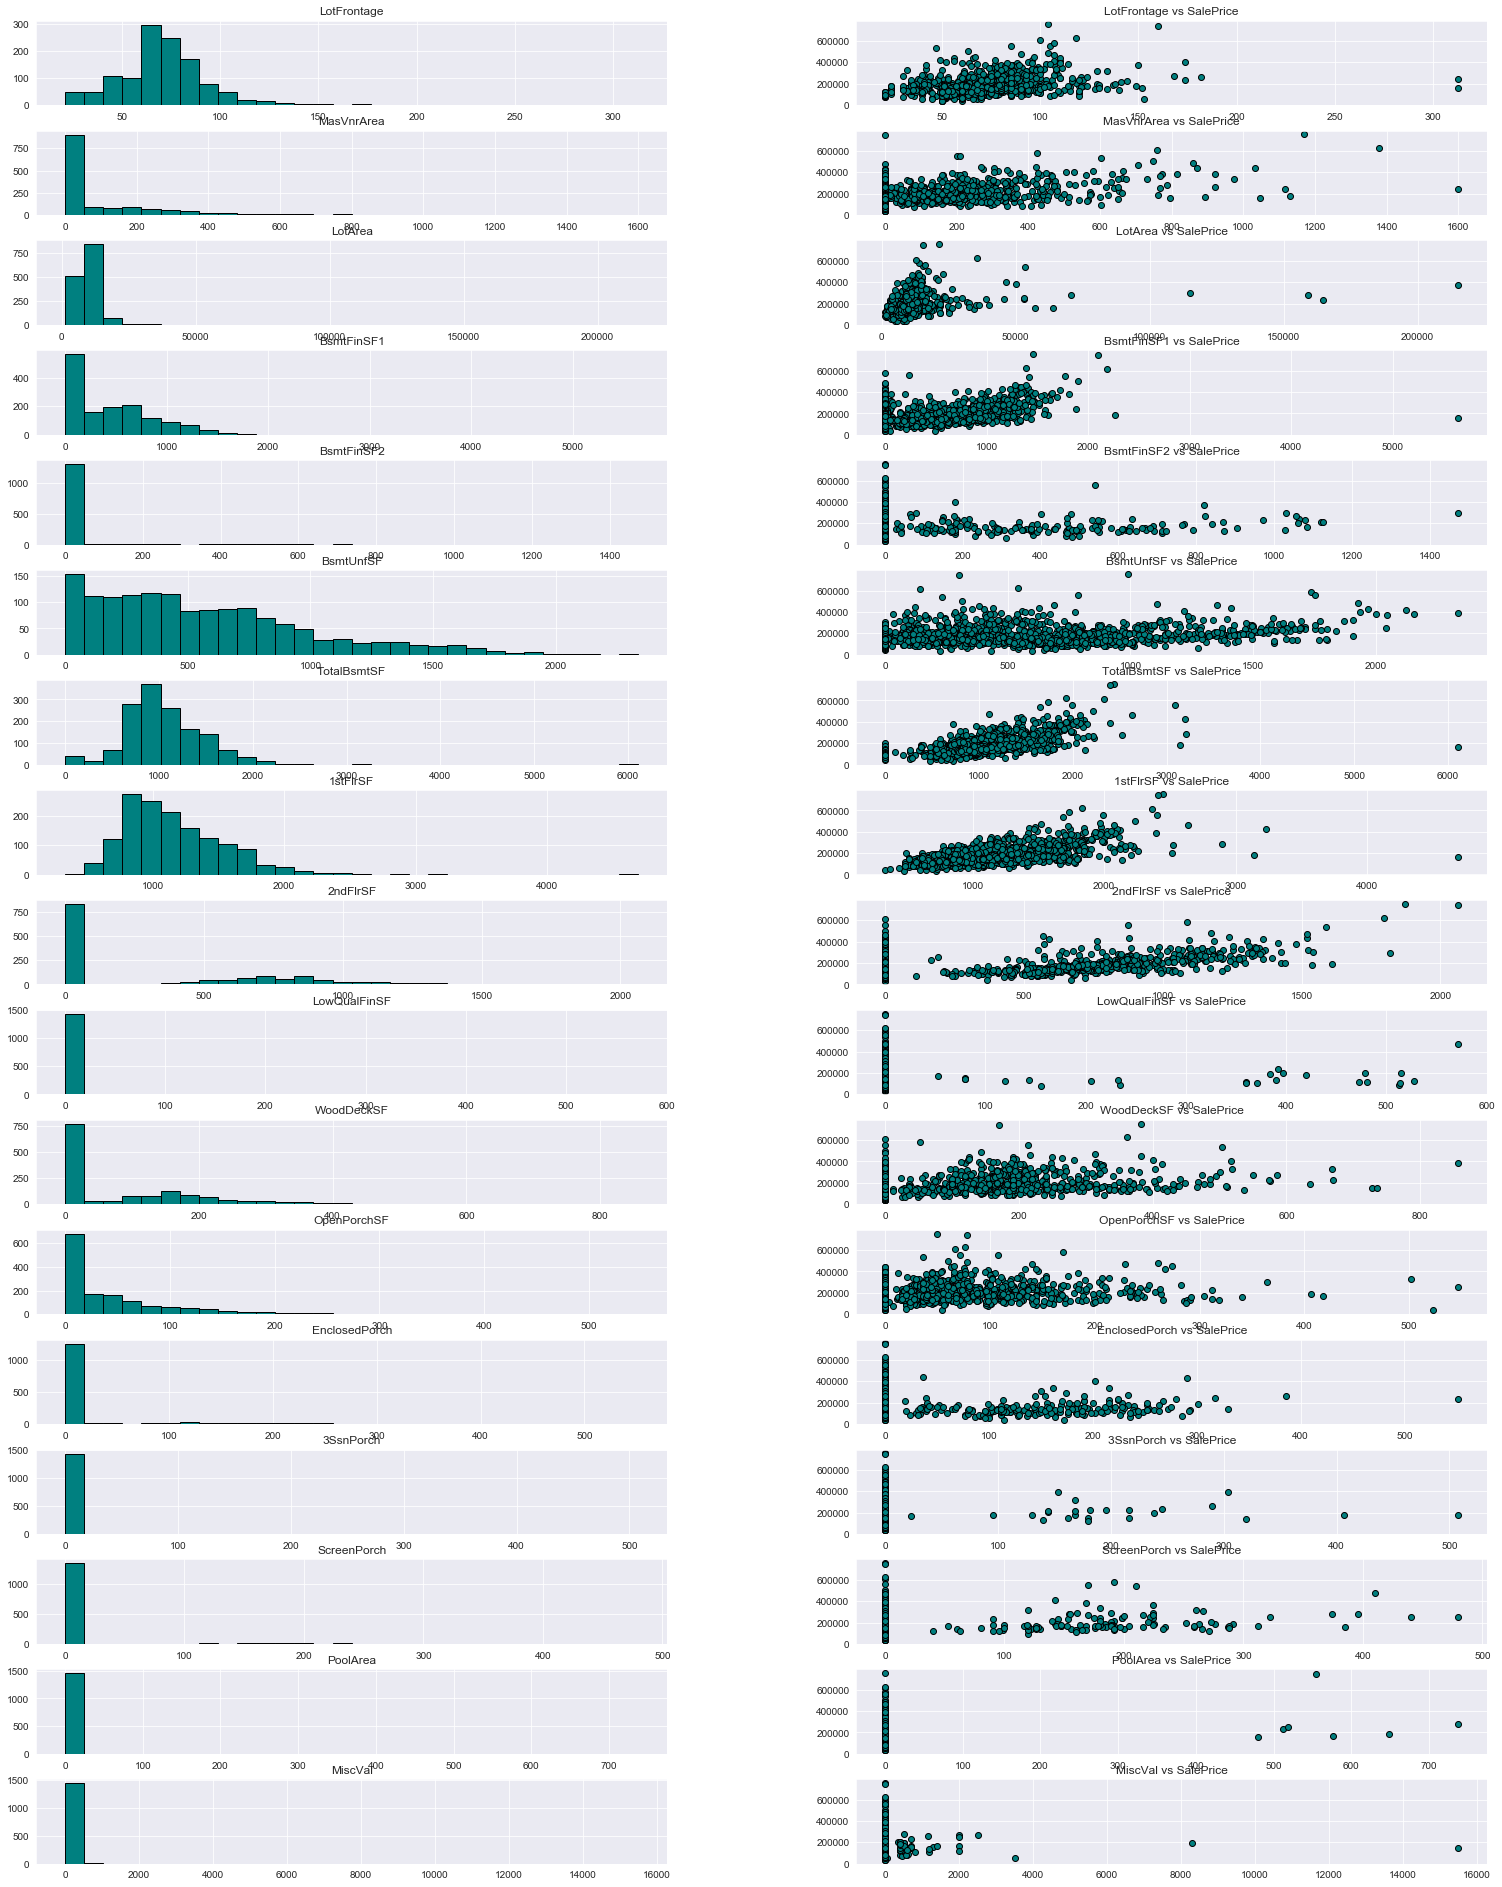

In [31]:
# Numeric variables vs SalePrice

sns.set_style('darkgrid')
plt.figure(figsize=(26,32))
plt.subplot(17,2,1)
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.hist(train['LotFrontage'], bins=30, edgecolor= 'black',color ='teal')
plt.title('LotFrontage')

plt.subplot(17,2,2)
plt.scatter(x=train.LotFrontage, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('LotFrontage vs SalePrice')

plt.subplot(17,2,3)
plt.hist(train['MasVnrArea'], bins=30, edgecolor= 'black',color ='teal')
plt.title('MasVnrArea')

plt.subplot(17,2,4)
plt.scatter(x=train.MasVnrArea, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('MasVnrArea vs SalePrice')

plt.subplot(17,2,5)
plt.hist(train['LotArea'], bins=30, edgecolor= 'black',color ='teal')
plt.title('LotArea')

plt.subplot(17,2,6)
plt.scatter(x=train.LotArea, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('LotArea vs SalePrice')

plt.subplot(17,2,7)
plt.hist(train['BsmtFinSF1'], bins=30, edgecolor= 'black',color ='teal')
plt.title('BsmtFinSF1')

plt.subplot(17,2,8)
plt.scatter(x=train.BsmtFinSF1, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('BsmtFinSF1 vs SalePrice')

plt.subplot(17,2,9)
plt.hist(train['BsmtFinSF2'], bins=30, edgecolor= 'black',color ='teal')
plt.title('BsmtFinSF2')

plt.subplot(17,2,10)
plt.scatter(x=train.BsmtFinSF2, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('BsmtFinSF2 vs SalePrice')

plt.subplot(17,2,11)
plt.hist(train['BsmtUnfSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('BsmtUnfSF')

plt.subplot(17,2,12)
plt.scatter(x=train.BsmtUnfSF, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('BsmtUnfSF vs SalePrice')

plt.subplot(17,2,13)
plt.hist(train['TotalBsmtSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('TotalBsmtSF')

plt.subplot(17,2,14)
plt.scatter(x=train.TotalBsmtSF, y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('TotalBsmtSF vs SalePrice')

plt.subplot(17,2,15)
plt.hist(train['1stFlrSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('1stFlrSF')

plt.subplot(17,2,16)
plt.scatter(x=train['1stFlrSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('1stFlrSF vs SalePrice')

plt.subplot(17,2,17)
plt.hist(train['2ndFlrSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('2ndFlrSF')

plt.subplot(17,2,18)
plt.scatter(x=train['2ndFlrSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('2ndFlrSF vs SalePrice')

plt.subplot(17,2,19)
plt.hist(train['LowQualFinSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('LowQualFinSF')

plt.subplot(17,2,20)
plt.scatter(x=train['LowQualFinSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('LowQualFinSF vs SalePrice')

plt.subplot(17,2,21)
plt.hist(train['WoodDeckSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('WoodDeckSF')

plt.subplot(17,2,22)
plt.scatter(x=train['WoodDeckSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('WoodDeckSF vs SalePrice')

plt.subplot(17,2,23)
plt.hist(train['OpenPorchSF'], bins=30, edgecolor= 'black',color ='teal')
plt.title('OpenPorchSF')

plt.subplot(17,2,24)
plt.scatter(x=train['OpenPorchSF'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('OpenPorchSF vs SalePrice')

plt.subplot(17,2,25)
plt.hist(train['EnclosedPorch'], bins=30, edgecolor= 'black',color ='teal')
plt.title('EnclosedPorch')

plt.subplot(17,2,26)
plt.scatter(x=train['EnclosedPorch'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('EnclosedPorch vs SalePrice')

plt.subplot(17,2,27)
plt.hist(train['3SsnPorch'], bins=30, edgecolor= 'black',color ='teal')
plt.title('3SsnPorch')

plt.subplot(17,2,28)
plt.scatter(x=train['3SsnPorch'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('3SsnPorch vs SalePrice')

plt.subplot(17,2,29)
plt.hist(train['ScreenPorch'], bins=30, edgecolor= 'black',color ='teal')
plt.title('ScreenPorch')

plt.subplot(17,2,30)
plt.scatter(x=train['ScreenPorch'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('ScreenPorch vs SalePrice')

plt.subplot(17,2,31)
plt.hist(train['PoolArea'], bins=30, edgecolor= 'black',color ='teal')
plt.title('PoolArea')

plt.subplot(17,2,32)
plt.scatter(x=train['PoolArea'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('PoolArea vs SalePrice')

plt.subplot(17,2,33)
plt.hist(train['MiscVal'], bins=30, edgecolor= 'black',color ='teal')
plt.title('MiscVal')

plt.subplot(17,2,34)
plt.scatter(x=train['MiscVal'], y=train.SalePrice,edgecolor= 'black',color ='teal')
plt.title('MiscVal vs SalePrice')

plt.show()

#### Observed Outliers
* LotFrontage > 300
* GarageArea > 1200
* GarageCars > 3.5
* LotFrontage > 300
* MasVnrArea > 1500
* BsmtFinSF2 > 5000
* 1stFlrSF > 4000

## Analysing categorical variables

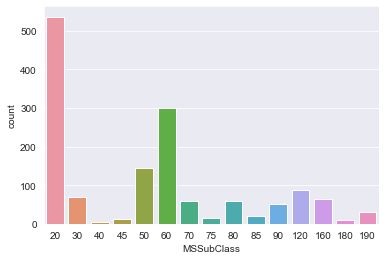

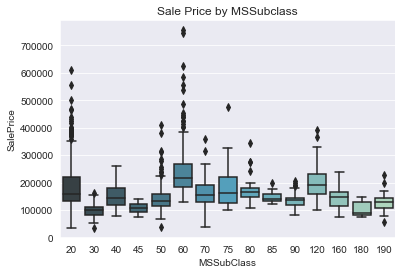

In [32]:
#MSSubClass
sns.countplot(train.MSSubClass)
plt.show()
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by MSSubclass');
#Note correlation seems to be very less with Sale Price

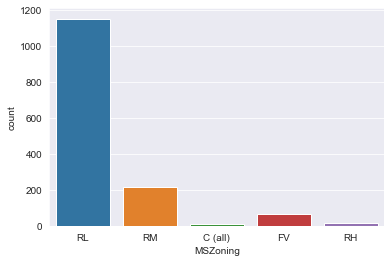

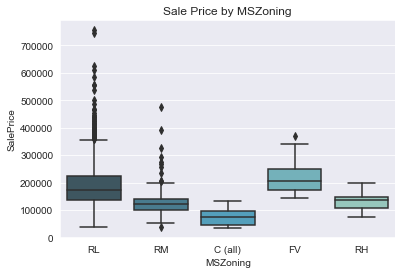

In [33]:
#MSZoning
sns.countplot(train.MSZoning)
plt.show()
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by MSZoning');

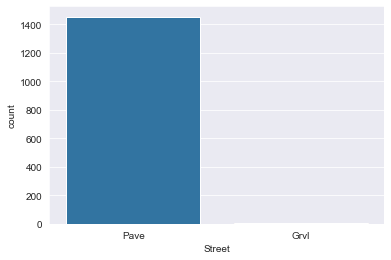

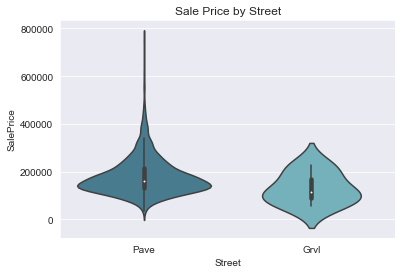

In [34]:
#Street
sns.countplot(train.Street)
plt.show()
sns.violinplot(x = 'Street', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Street');

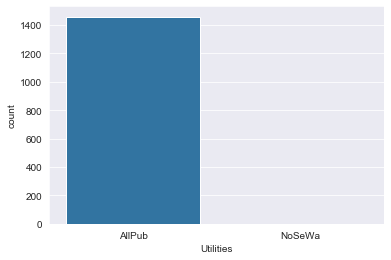

In [35]:
#Utilities
sns.countplot(train.Utilities) 
#This feature has only one value will delete it later

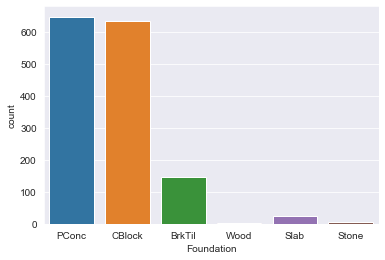

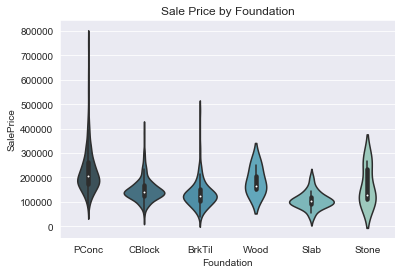

In [37]:
#Foundation
sns.countplot(train.Foundation)
plt.show()
sns.violinplot(x = 'Foundation', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Foundation');

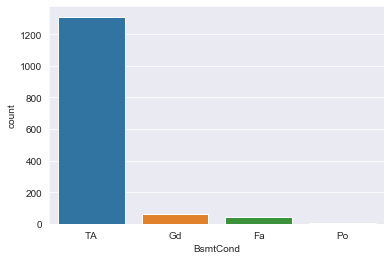

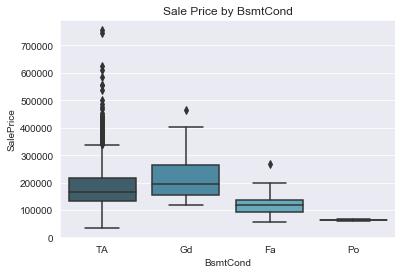

In [38]:
#BsmtCond
sns.countplot(train.BsmtCond)
plt.show()
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BsmtCond');

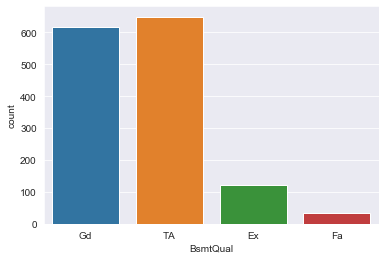

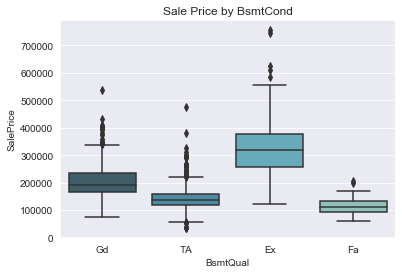

In [39]:
#BsmtQual
sns.countplot(train.BsmtQual)
plt.show()
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BsmtCond');

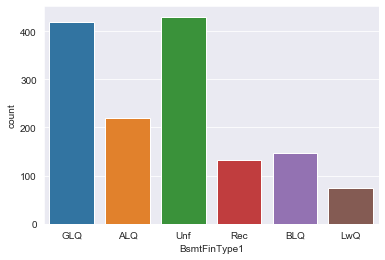

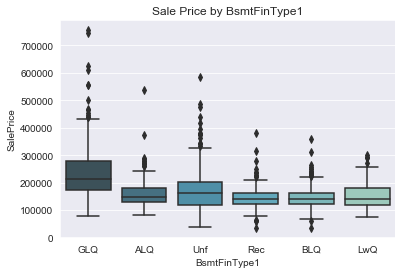

In [40]:
#BsmtFinType1
sns.countplot(train.BsmtFinType1)
plt.show()
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BsmtFinType1');

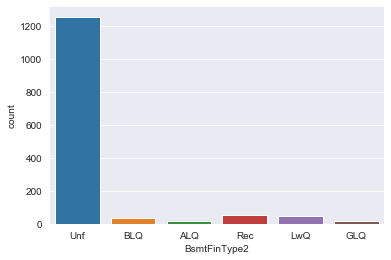

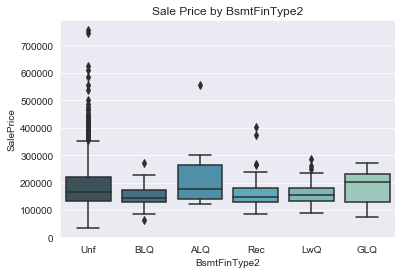

In [41]:
#BsmtFinType2
sns.countplot(train.BsmtFinType2)
plt.show()
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BsmtFinType2');
#Majority is unfinished with clearly no impact on Sale Price

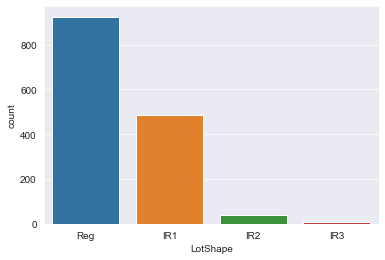

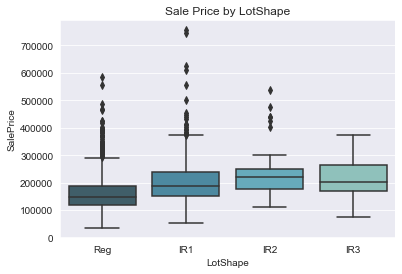

In [42]:
#LotShape 
sns.countplot(train.LotShape)
plt.show()
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by LotShape');

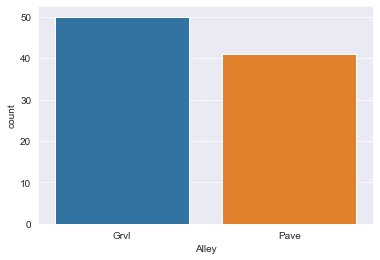

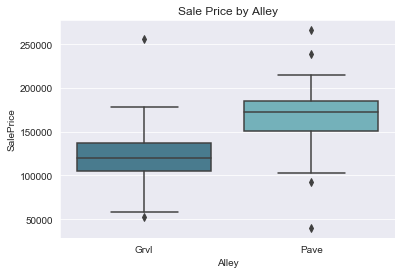

In [43]:
#Alley 
sns.countplot(train.Alley)
plt.show()
sns.boxplot(x = 'Alley', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Alley');
#Can conclude that paved alley leads to much higher prices than gravel

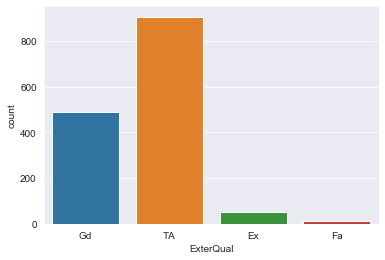

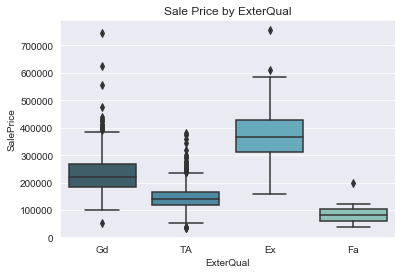

In [44]:
#ExterQual
sns.countplot(train.ExterQual)
plt.show()
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by ExterQual');

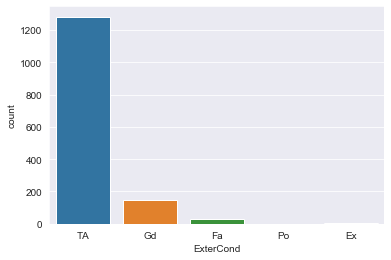

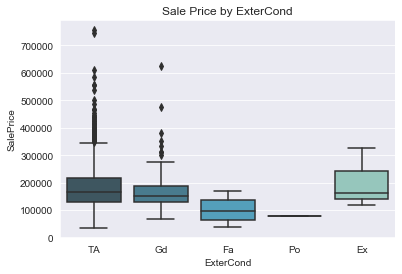

In [45]:
#ExterCond
sns.countplot(train.ExterCond)
plt.show()
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by ExterCond');
#Note most are TA, hardly any correlation in the data

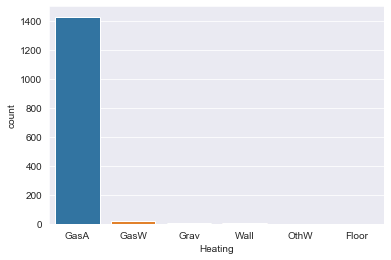

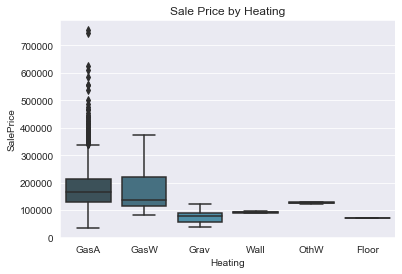

In [46]:
#Heating
sns.countplot(train.Heating)
plt.show()
sns.boxplot(x = 'Heating', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Heating');
#Again data dominated by one category

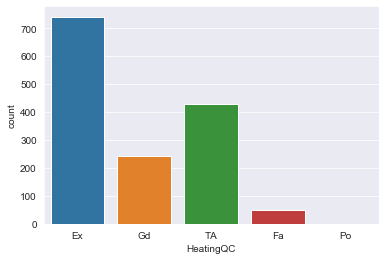

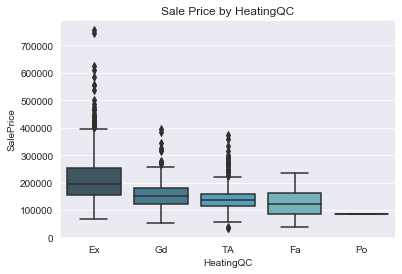

In [47]:
#HeatingQC
sns.countplot(train.HeatingQC)
plt.show()
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by HeatingQC');

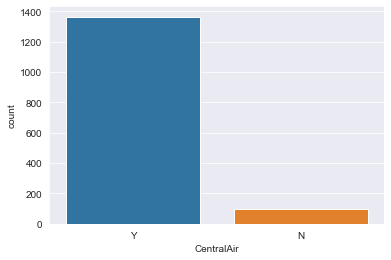

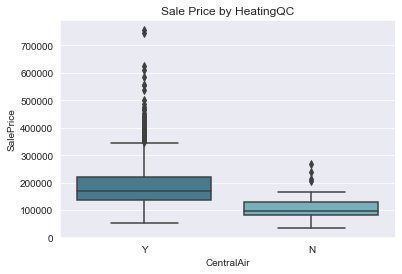

In [48]:
#CentralAir
sns.countplot(train.CentralAir)
plt.show()
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by HeatingQC');
#Houses with CentralAC have higher SalePrice

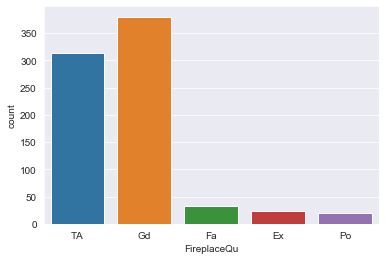

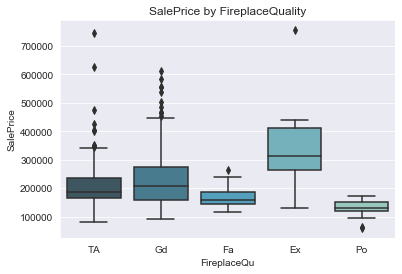

In [49]:
#FireplaceQuality
sns.countplot(train.FireplaceQu)
plt.show()
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('SalePrice by FireplaceQuality');

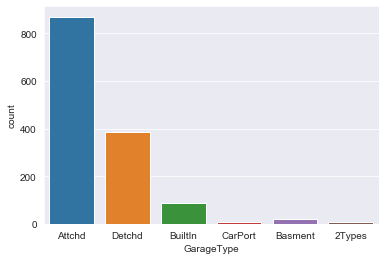

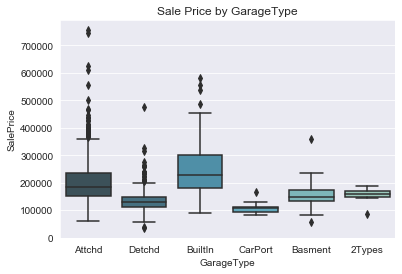

In [50]:
#GarageType
sns.countplot(train.GarageType)
plt.show()
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by GarageType');

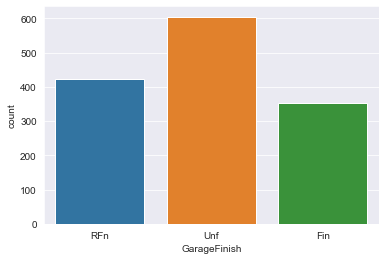

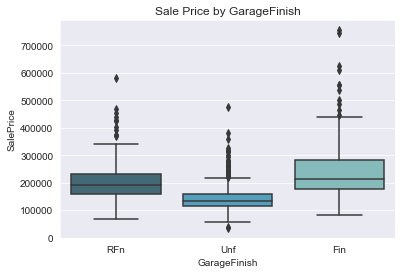

In [51]:
#GarageFinish
sns.countplot(train.GarageFinish)
plt.show()
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by GarageFinish');

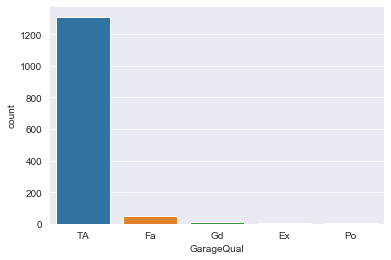

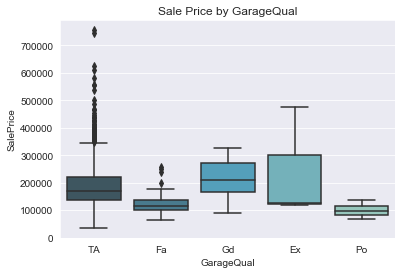

In [52]:
#GarageQual
sns.countplot(train.GarageQual)
plt.show()
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by GarageQual');

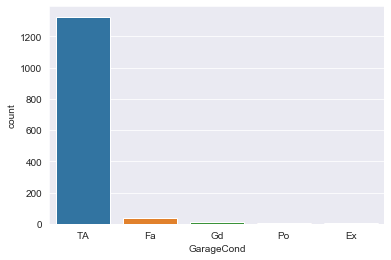

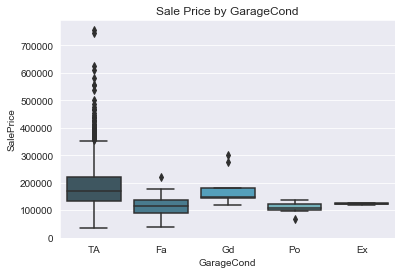

In [53]:
#GarageCond
sns.countplot(train.GarageCond)
plt.show()
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by GarageCond');

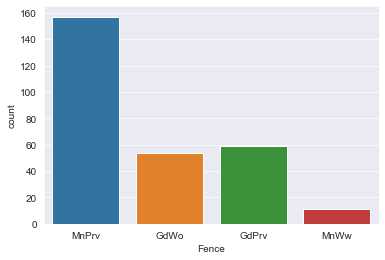

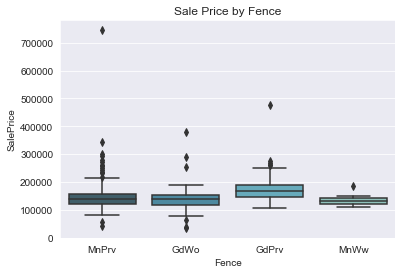

In [54]:
#Fence
sns.countplot(train.Fence)
plt.show()
sns.boxplot(x = 'Fence', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Fence');

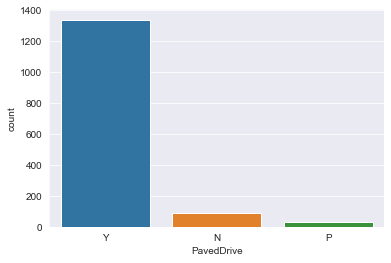

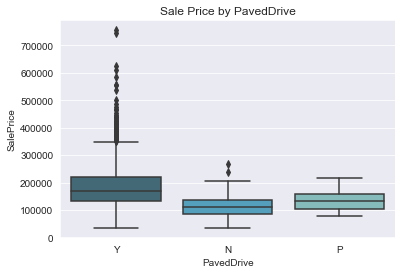

In [55]:
#PavedDrive
sns.countplot(train.PavedDrive)
plt.show()
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by PavedDrive');

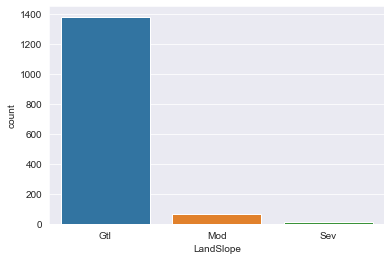

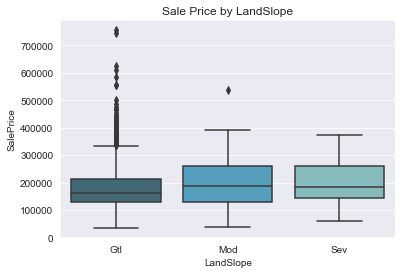

In [56]:
#LandSlope
sns.countplot(train.LandSlope)
plt.show()
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by LandSlope');
#Not much corelation here!

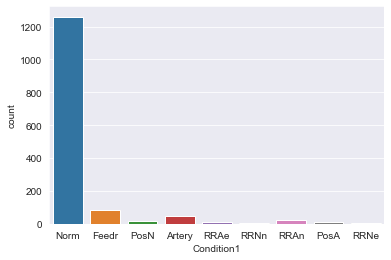

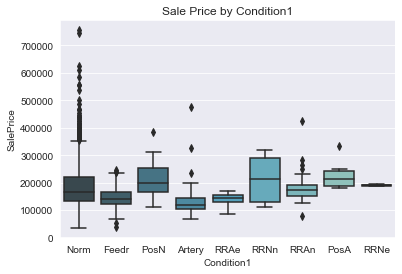

In [57]:
#Condition1
sns.countplot(train.Condition1)
plt.show()
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Condition1');

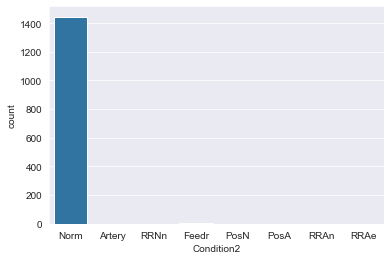

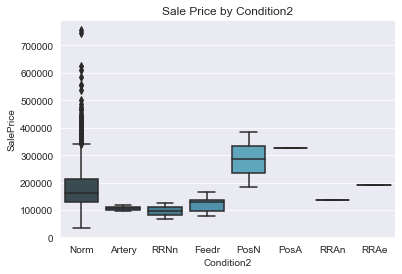

In [58]:
#Condition2
sns.countplot(train.Condition2)
plt.show()
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Condition2');

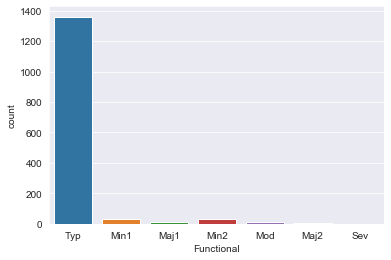

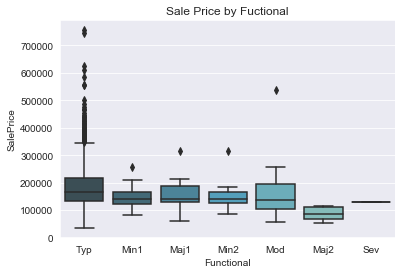

In [59]:
#Functional
sns.countplot(train.Functional)
plt.show()
sns.boxplot(x = 'Functional', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Fuctional');

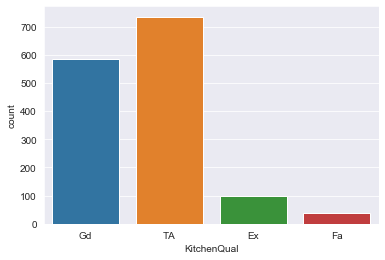

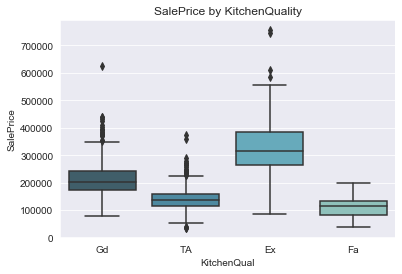

In [60]:
#KitchenQual
sns.countplot(train.KitchenQual)
plt.show()
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('SalePrice by KitchenQuality');

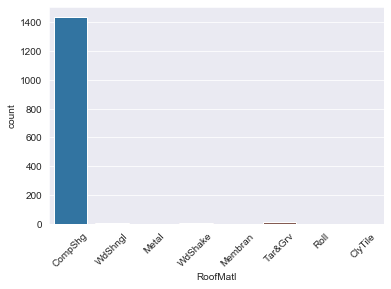

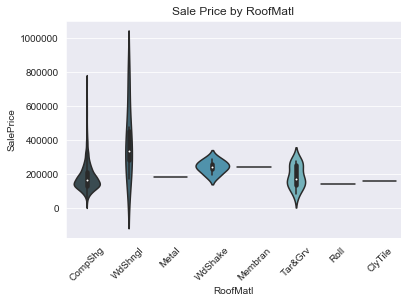

In [61]:
#RoofMatl
sns.countplot(train.RoofMatl)
plt.xticks(rotation=45)
plt.show()
sns.violinplot(x = 'RoofMatl', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by RoofMatl')
plt.xticks(rotation=45);
#Important indicator of SalePrice

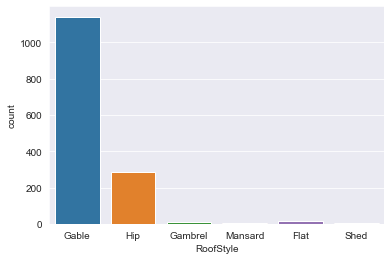

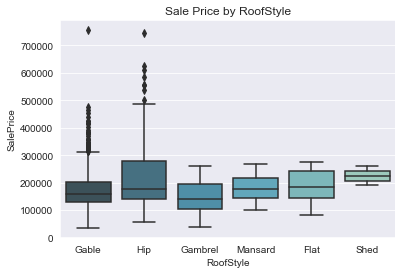

In [62]:
#RoofStyle
sns.countplot(train.RoofStyle)
plt.show()
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by RoofStyle');

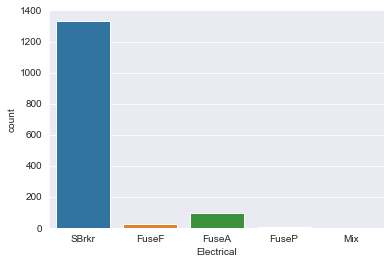

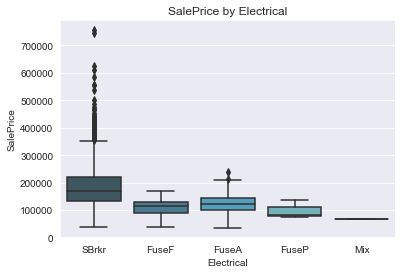

In [63]:
#Electrical
sns.countplot(train.Electrical)
plt.show()
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('SalePrice by Electrical');

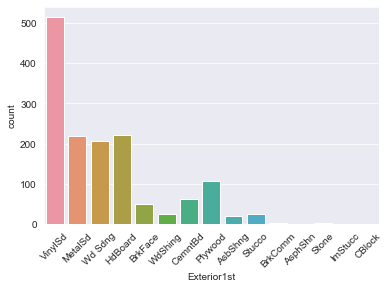

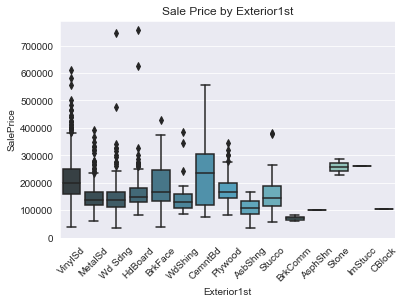

In [64]:
#Exterior1st
sns.countplot(train.Exterior1st)
plt.xticks(rotation=45)
plt.show()
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Exterior1st')
plt.xticks(rotation=45);

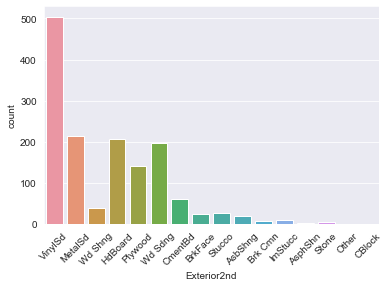

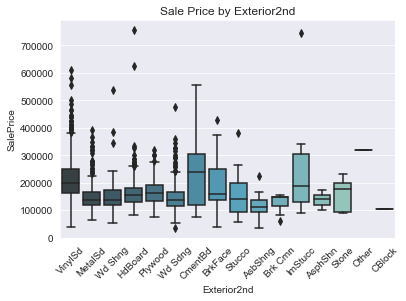

In [65]:
#Exterior2nd
sns.countplot(train.Exterior2nd)
plt.xticks(rotation=45)
plt.show()
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by Exterior2nd');
plt.xticks(rotation=45);

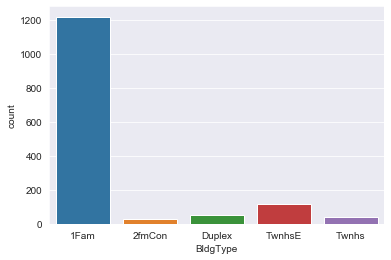

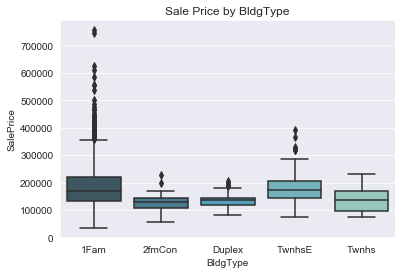

In [66]:
#BldgType
sns.countplot(train.BldgType) 
plt.show()
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by BldgType');

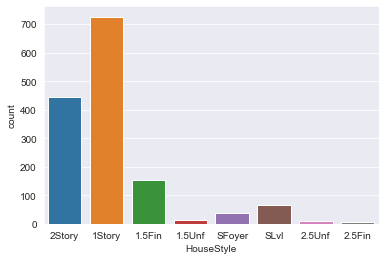

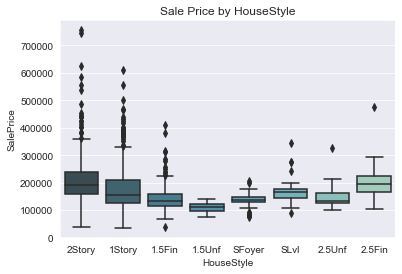

In [67]:
#HouseStyle
sns.countplot(train.HouseStyle)
plt.show()
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by HouseStyle');

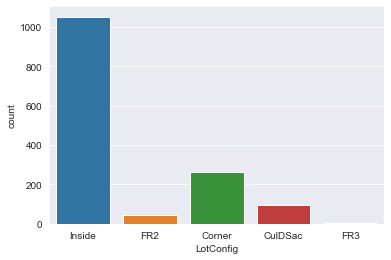

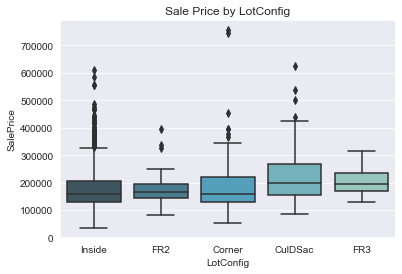

In [68]:
#LotConfig
sns.countplot(train.LotConfig)
plt.show()
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by LotConfig');

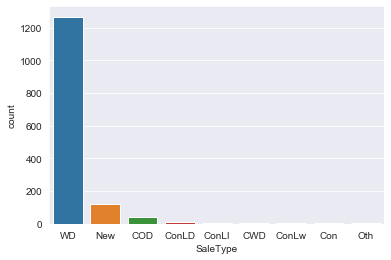

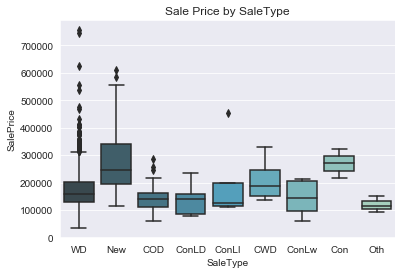

In [69]:
#SaleType
sns.countplot(train.SaleType)
plt.show()
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by SaleType');

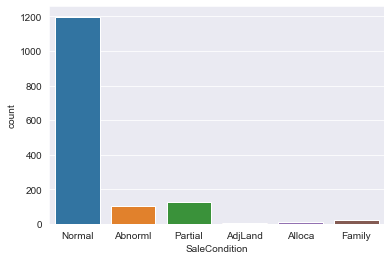

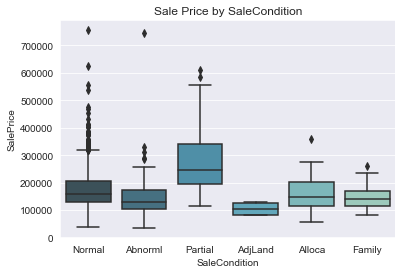

In [70]:
#SaleCondition
sns.countplot(train.SaleCondition)
plt.show()
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by SaleCondition');

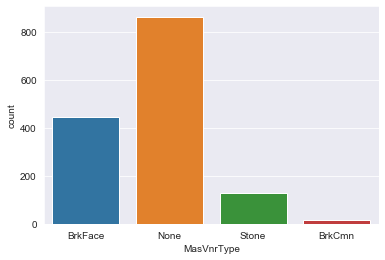

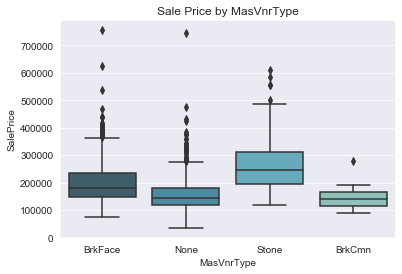

In [71]:
#MasVnrType
sns.countplot(train.MasVnrType)
plt.show()
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by MasVnrType');

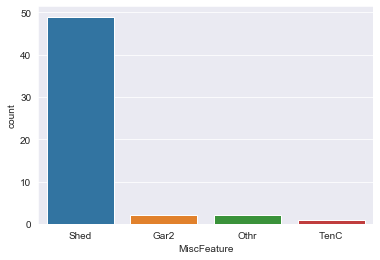

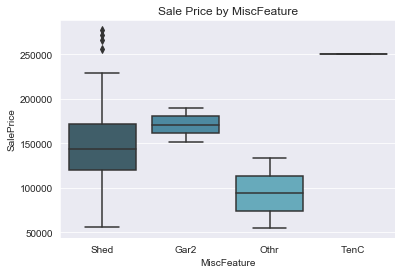

In [72]:
#MiscFeature
sns.countplot(train.MiscFeature)
plt.show()
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by MiscFeature');

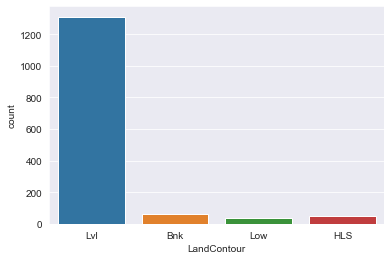

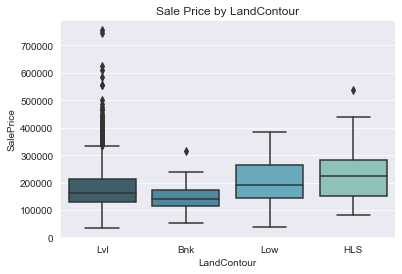

In [73]:
#LandContour
sns.countplot(train.LandContour)
plt.show()
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = train, palette= 'GnBu_d').set_title('Sale Price by LandContour');

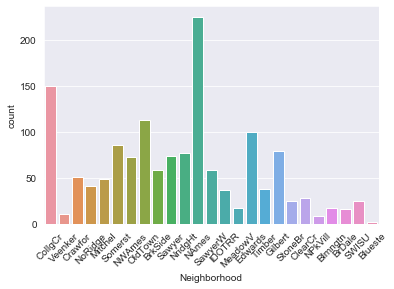

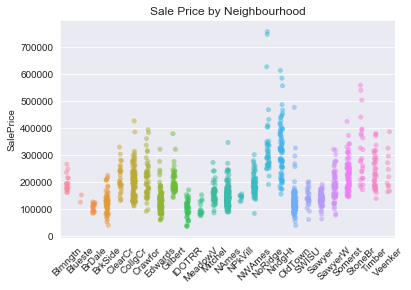

In [74]:
#Neighborhood
sns.countplot(train.Neighborhood)
plt.xticks(rotation=45)
plt.show()
sns.stripplot(x = train.Neighborhood.values, y = train.SalePrice,
              order = np.sort(train.Neighborhood.unique()),
              jitter=0.1, alpha=0.5).set_title('Sale Price by Neighbourhood')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [75]:
#Combining train and test - Feature engg will need to be done on both train and test set
train_copy=train.copy()
train_copy.drop(['SalePrice'], axis=1, inplace=True)
combined=train_copy.append(test)
combined.reset_index(inplace=True)
combined.drop(['index','Id'], axis=1, inplace=True)

### Outliers

In [76]:
index_drop = combined[:1461].GrLivArea[combined[:1461].GrLivArea>4000].index
index_drop = np.append(index_drop, combined[:1461].GarageArea[combined[:1461].GarageArea>1200].index)
index_drop = np.append(index_drop, combined[:1461].GarageCars[combined[:1461].GarageCars>3.5].index)
index_drop = np.append(index_drop, combined[:1461].LotFrontage[combined[:1461].LotFrontage>300].index)
index_drop = np.append(index_drop, combined[:1461].MasVnrArea[combined[:1461].MasVnrArea>1500].index)
index_drop = np.append(index_drop, combined[:1461].BsmtFinSF2[combined[:1461].BsmtFinSF2>5000].index)
index_drop = np.append(index_drop, combined[:1461]['1stFlrSF'][combined[:1461]['1stFlrSF']>4000].index)
combined = combined.drop(index_drop).reset_index(drop=True)
print("{} examples in the training set are dropped.".format(len(index_drop)))

18 examples in the training set are dropped.


### Replacing categorical with numeric values

In [77]:
# A lot of the fields are null simply because it is absent, for example pool or alley is just not there, hence nan replaced by 0
combined.PoolQC = combined.PoolQC.map({np.nan:0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
combined.Alley = combined.Alley.map({np.nan:0, 'Grvl':1, 'Pave':2})
combined.Fence = combined.Fence.map({np.nan:0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})
combined.FireplaceQu = combined.FireplaceQu.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.GarageQual = combined.GarageQual.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.GarageCond = combined.GarageCond.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.GarageFinish = combined.GarageFinish.map({np.nan:0, 'Unf':1, 'RFn':2, 'Fin':3})
combined.GarageType = combined.GarageType.map({np.nan:0, 'Detchd':1, 'CarPort':2, 'BuiltIn':3, 'Basment':4, 'Attchd':5, '2Types':6})
combined.BsmtCond = combined.BsmtCond.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.BsmtQual = combined.BsmtQual.map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.BsmtFinType1 = combined.BsmtFinType1.map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
combined.BsmtFinType2 = combined.BsmtFinType2.map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
combined.BsmtExposure = combined.BsmtExposure.map({np.nan:0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})

#Some of the categorical variables have rank values, hence easily transformable to numerical
combined.ExterQual = combined.ExterQual.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
combined.ExterCond = combined.ExterCond.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
combined.HeatingQC = combined.HeatingQC.map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
combined.CentralAir = combined.CentralAir.map({'Y':1, 'N':0})
combined.PavedDrive = combined.PavedDrive.map({'N':0, 'P':1, 'Y':2})
combined.Functional = combined.Functional.map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
combined.KitchenQual = combined.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
combined.Electrical = combined.Electrical.map({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

### Imputing missing values

In [78]:
combined.MiscFeature.fillna('NA', inplace=True)
combined.MasVnrType.fillna('None', inplace=True)
combined.MasVnrArea.fillna(0, inplace=True)
combined.BsmtFullBath.fillna(0, inplace=True)
combined.BsmtHalfBath.fillna(0, inplace=True)
combined.BsmtFinSF1.fillna(0, inplace=True)
combined.BsmtFinSF2.fillna(0, inplace=True)
combined.TotalBsmtSF.fillna(0, inplace=True)
combined.BsmtUnfSF.fillna(0, inplace=True)
combined.GarageArea.fillna(0, inplace=True)
combined.GarageCars.fillna(0, inplace=True)
combined.GarageYrBlt.fillna(0, inplace=True)
combined.Utilities.fillna(combined.Utilities.mode()[0], inplace=True)
combined.KitchenQual.fillna(combined.KitchenQual.mode()[0], inplace=True)
combined.SaleType.fillna(combined.SaleType.mode()[0], inplace=True)
combined.Functional.fillna(combined.Functional.mode()[0], inplace=True)
combined.Electrical.fillna(combined.Electrical.mode()[0], inplace=True)
combined.MSZoning.fillna(combined.MSZoning.mode()[0], inplace=True)
combined.Exterior1st.fillna(combined.Exterior1st.mode()[0], inplace=True)
combined.Exterior2nd.fillna(combined.Exterior2nd.mode()[0], inplace=True)
combined.LotFrontage.fillna(combined.LotFrontage.median(), inplace=True)

### Dealing with time variables

In [79]:
#There are 5 time variables. We will convert them to age to reduce the number of variables, make them more meaningful,
#Introducing 3 new age variables

combined['Age'] = combined.YrSold - combined.YearBuilt
combined['AgeRemod'] = combined.YrSold - combined.YearRemodAdd
combined['AgeGarage'] = combined.YrSold - combined.GarageYrBlt #contains 159 null values

In [80]:
#In some cases Age of garage is ~2000, because of filling null values with zero.
#Here we will put a threshold value of 1000 to proceed
max_AgeGarage = np.max(combined.AgeGarage[combined.AgeGarage < 1000])
combined['AgeGarage'] = combined['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

In [81]:
#If there are any negative values, they will be replaced by zero
combined.Age = combined.Age.map(lambda x: 0 if x < 0 else x)
combined.AgeRemod = combined.AgeRemod.map(lambda x: 0 if x < 0 else x)
combined.AgeGarage = combined.AgeGarage.map(lambda x: 0 if x < 0 else x)

In [82]:
#Now we can drop the original time variables
combined.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold'],axis=1, inplace=True)

### Transforming categorical variables to dummy columns

In [83]:
#MSZoning
MSZoning_dummies=pd.get_dummies(combined['MSZoning'], prefix='MSZoning_', drop_first=True)
combined=pd.concat([combined, MSZoning_dummies], axis=1)
combined.drop('MSZoning', axis=1, inplace=True)

#LotShape - This is not a rank variable because we can't conclude if one shape is better than the other
LotShape_dummies=pd.get_dummies(combined['LotShape'], prefix='LotShape_', drop_first=True)
combined=pd.concat([combined, LotShape_dummies], axis=1)
combined.drop('LotShape', axis=1, inplace=True)

#LotConfig
LotConfig_dummies=pd.get_dummies(combined['LotConfig'], prefix='LotConfig_', drop_first=True)
combined=pd.concat([combined, LotConfig_dummies], axis=1)
combined.drop('LotConfig', axis=1, inplace=True)

#LandContour
LandContour_dummies=pd.get_dummies(combined['LandContour'], prefix='LandContour_', drop_first=True)
combined=pd.concat([combined, LandContour_dummies], axis=1)
combined.drop('LandContour', axis=1, inplace=True)

#MasVnrType
MasVnrType_dummies=pd.get_dummies(combined['MasVnrType'], prefix='MasVnrType_', drop_first=True)
combined=pd.concat([combined, MasVnrType_dummies], axis=1)
combined.drop('MasVnrType', axis=1, inplace=True)

#Street
Street_dummies=pd.get_dummies(combined['Street'], prefix='Street_', drop_first=True)
combined=pd.concat([combined, Street_dummies], axis=1)
combined.drop('Street', axis=1, inplace=True)

#Foundation
Foundation_dummies=pd.get_dummies(combined['Foundation'], prefix='Foundation_', drop_first=True)
combined=pd.concat([combined, Foundation_dummies], axis=1)
combined.drop('Foundation', axis=1, inplace=True)

#Heating
Heating_dummies=pd.get_dummies(combined['Heating'], prefix='Heating_', drop_first=True)
combined=pd.concat([combined, Heating_dummies], axis=1)
combined.drop('Heating', axis=1, inplace=True)

#LandSlope
LandSlope_dummies=pd.get_dummies(combined['LandSlope'], prefix='LandSlope_', drop_first=True)
combined=pd.concat([combined, LandSlope_dummies], axis=1)
combined.drop('LandSlope', axis=1, inplace=True)

#Neighborhood
Neighborhood_dummies=pd.get_dummies(combined['Neighborhood'], prefix='Neighborhood_', drop_first=True)
combined=pd.concat([combined, Neighborhood_dummies], axis=1)
combined.drop('Neighborhood', axis=1, inplace=True)

#Condition1
Condition1_dummies=pd.get_dummies(combined['Condition1'], prefix='Condition1_', drop_first=True)
combined=pd.concat([combined, Condition1_dummies], axis=1)
combined.drop('Condition1', axis=1, inplace=True)

#Condition2
Condition2_dummies=pd.get_dummies(combined['Condition2'], prefix='Condition2_', drop_first=True)
combined=pd.concat([combined, Condition2_dummies], axis=1)
combined.drop('Condition2', axis=1, inplace=True)

#RoofMatl
RoofMatl_dummies=pd.get_dummies(combined['RoofMatl'], prefix='RoofMatl_', drop_first=True)
combined=pd.concat([combined, RoofMatl_dummies], axis=1)
combined.drop('RoofMatl', axis=1, inplace=True)

#RoofStyle
RoofStyle_dummies=pd.get_dummies(combined['RoofStyle'], prefix='RoofStyle_', drop_first=True)
combined=pd.concat([combined, RoofStyle_dummies], axis=1)
combined.drop('RoofStyle', axis=1, inplace=True)

#Exterior1st
Exterior1st_dummies=pd.get_dummies(combined['Exterior1st'], prefix='Exterior1st_', drop_first=True)
combined=pd.concat([combined, Exterior1st_dummies], axis=1)
combined.drop('Exterior1st', axis=1, inplace=True)

#Exterior2nd
Exterior2nd_dummies=pd.get_dummies(combined['Exterior2nd'], prefix='Exterior2nd_', drop_first=True)
combined=pd.concat([combined, Exterior2nd_dummies], axis=1)
combined.drop('Exterior2nd', axis=1, inplace=True)

#BldgType
BldgType_dummies=pd.get_dummies(combined['BldgType'], prefix='BldgType_', drop_first=True)
combined=pd.concat([combined, BldgType_dummies], axis=1)
combined.drop('BldgType', axis=1, inplace=True)

#HouseStyle
HouseStyle_dummies=pd.get_dummies(combined['HouseStyle'], prefix='HouseStyle_', drop_first=True)
combined=pd.concat([combined, HouseStyle_dummies], axis=1)
combined.drop('HouseStyle', axis=1, inplace=True)

#SaleType
SaleType_dummies=pd.get_dummies(combined['SaleType'], prefix='SaleType_', drop_first=True)
combined=pd.concat([combined, SaleType_dummies], axis=1)
combined.drop('SaleType', axis=1, inplace=True)

#SaleCondition
SaleCondition_dummies=pd.get_dummies(combined['SaleCondition'], prefix='SaleCondition_', drop_first=True)
combined=pd.concat([combined, SaleCondition_dummies], axis=1)
combined.drop('SaleCondition', axis=1, inplace=True)

#MiscFeature
MiscFeature_dummies=pd.get_dummies(combined['MiscFeature'], prefix='MiscFeature_', drop_first=True)
combined=pd.concat([combined, MiscFeature_dummies], axis=1)
combined.drop('MiscFeature', axis=1, inplace=True)

#MSSubClass
combined.MSSubClass = combined.MSSubClass.map({20:'class1', 30:'class2', 40:'class3', 45:'class4', 50:'class5', 60:'class6',	70:'class7', 75:'class8', 80:'class9',85:'class10', 90:'class11', 120:'class12',	
150:'class13', 160:'class14', 180:'class15',190:'class16'})
MSSubClass_dummies=pd.get_dummies(combined['MSSubClass'], prefix='MSSubClass_', drop_first=True)
combined=pd.concat([combined, MSSubClass_dummies], axis=1)
combined.drop('MSSubClass', axis=1, inplace=True)

In [84]:
#Utilities - This column has same values throughout except one different value in training set
combined.drop('Utilities', axis=1, inplace=True)

In [85]:
# Shape of data after feature engineering
combined.shape

(2905, 206)

* 206 features that's too much for a machine learning lets use XGB Regressor to select important features 
 and drop unimportant features for building machine learning models

### Separate the independent and dependent feature into X & y respectively

In [86]:
# X and Y 
X=combined[:-1459]
y=targets
y = y.drop(index_drop).reset_index(drop=True)

In [87]:
xgb = XGBRegressor()
xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [88]:
# Features
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp = imp.sort_values(['Importance'], ascending = False)
print(imp)

                    Importance
GarageCars            0.218566
GarageFinish          0.108589
CentralAir            0.084693
GarageCond            0.073615
KitchenQual           0.054770
...                        ...
BldgType__2fmCon      0.000000
Street__Pave          0.000000
HouseStyle__2.5Fin    0.000000
Condition2__RRAn      0.000000
Condition1__RRNn      0.000000

[206 rows x 1 columns]


In [89]:
#Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

In [90]:
rmse = make_scorer(rmse, greater_is_better=False)

In [91]:
rfecv = RFECV(estimator=xgb, step=1, cv=3, n_jobs=-1, scoring=rmse)
rfecv = rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 72


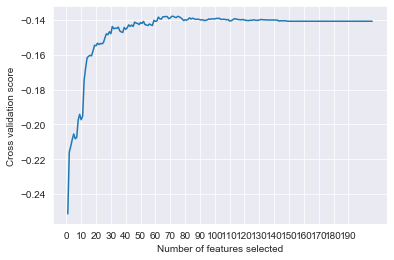

In [92]:
#Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.xticks(np.arange(0,200,10))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [93]:
# Lets print selected features for model building
features_kept = X.columns.values[rfecv.support_] 
X = X[features_kept]
print(*X.columns, sep="\n")
X.shape

LotFrontage
LotArea
OverallQual
OverallCond
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
CentralAir
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
Functional
Fireplaces
FireplaceQu
GarageType
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
PoolArea
Age
AgeRemod
AgeGarage
MSZoning__FV
MSZoning__RM
LotConfig__CulDSac
LandContour__HLS
Foundation__PConc
LandSlope__Mod
Neighborhood__BrkSide
Neighborhood__Crawfor
Neighborhood__Edwards
Neighborhood__MeadowV
Neighborhood__Mitchel
Neighborhood__NWAmes
Neighborhood__OldTown
Neighborhood__StoneBr
Condition1__Feedr
Condition1__Norm
Condition1__PosA
Condition1__RRAe
Condition2__Feedr
Condition2__Norm
Exterior1st__BrkComm
Exterior1st__BrkFace
Exterior1st__VinylSd
Exterior2nd__BrkFace
BldgType__Duplex
HouseStyle__SLvl
SaleType__ConLD
SaleCondition__Family
SaleConditio

(1446, 72)

In [94]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,Age,AgeRemod,AgeGarage,MSZoning__FV,MSZoning__RM,LotConfig__CulDSac,LandContour__HLS,Foundation__PConc,LandSlope__Mod,Neighborhood__BrkSide,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NWAmes,Neighborhood__OldTown,Neighborhood__StoneBr,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__RRAe,Condition2__Feedr,Condition2__Norm,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__VinylSd,Exterior2nd__BrkFace,BldgType__Duplex,HouseStyle__SLvl,SaleType__ConLD,SaleCondition__Family,SaleCondition__Normal,MSSubClass__class2
0,65.0,8450,7,5,3,2,4,3,1,6,706.0,0.0,150.0,856.0,1,856,854,1710,1.0,0.0,2,3,1,4.0,7.0,0,0,5,2,2.0,548.0,3,3,2,0,61,0,0,0,5,5,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,80.0,9600,6,8,2,2,4,3,4,5,978.0,0.0,284.0,1262.0,1,1262,0,1262,0.0,1.0,2,3,1,3.0,7.0,1,3,5,2,2.0,460.0,3,3,2,298,0,0,0,0,31,31,31.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,3,2,4,3,2,6,486.0,0.0,434.0,920.0,1,920,866,1786,1.0,0.0,2,3,1,4.0,7.0,1,3,5,2,2.0,608.0,3,3,2,0,42,0,0,0,7,6,7.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,60.0,9550,7,5,2,2,3,4,1,5,216.0,0.0,540.0,756.0,1,961,756,1717,1.0,0.0,1,3,1,4.0,7.0,1,4,1,1,3.0,642.0,3,3,2,0,35,272,0,0,91,36,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,8,5,3,2,4,3,3,6,655.0,0.0,490.0,1145.0,1,1145,1053,2198,1.0,0.0,2,4,1,4.0,7.0,1,3,5,2,3.0,836.0,3,3,2,192,84,0,0,0,8,8,8.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [95]:
X.drop(['PoolArea','1stFlrSF','GarageArea'],axis=1, inplace=True)

In [96]:
X.shape

(1446, 69)

## Machine Learning

In [97]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

#### Lasso Regression

In [98]:
#Lasso Regression

lasso = Lasso()
params_lasso={'alpha':[0.05,0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1]}
lasso_random = RandomizedSearchCV(estimator = lasso, param_distributions = params_lasso,
                               n_iter=50, cv=5, n_jobs=-1,random_state=42, verbose=2)
lasso_random.fit(X_train, y_train)
print(lasso_random.best_params_)
print(lasso_random.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 0.05}
0.8545236261048045


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


#### XGBoost Regressor

In [99]:
#XGBoost Regressor
params_boost ={
        'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
        'max_depth':[4,5,6,7,8,9,10],
        'min_child_weight':[1,3,5,7],
        'gamma':[0.1,0.2,0.3,0.4,0.5],
        'colsample_bytree':[0.3,0.4,0.5,0.7]}

xg_regressor = XGBRegressor()
xg_random = RandomizedSearchCV(estimator = xg_regressor, param_distributions = params_boost,
                               n_iter=50, cv=5, n_jobs=-1,random_state=42, verbose=2)
xg_random.fit(X_train, y_train)
print(xg_random.best_params_)
print(xg_random.best_score_)

xg_grid = GridSearchCV(estimator = xg_regressor, param_grid = params_boost, 
                          cv = 3, n_jobs = -1, verbose = 2)

xg_grid.fit(X_train, y_train)
print(xg_grid.best_params_)
print(xg_grid.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.2min finished


{'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.5}
0.9011145573205166
Fitting 3 folds for each of 3360 candidates, totalling 10080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

{'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 7}
0.9015629866267375


#### Random Forest Regression

In [100]:
#Random Forest Regressor

rf = RandomForestRegressor(random_state = 42)

#Hyperparamater tuning using RanodomSearchCV
print('Parameters currently in use:\n')
pprint(rf.get_params())
random_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5,
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)
print(rf_random.best_score_)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.8min finished


{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
0.878061736394691


In [ ]:
#Hyperparameter tuning using GridSearchCV

param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 600, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,9,10],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

#### Ridge Regression

In [101]:
#Ridge Regressor

params_ridge ={
        'alpha':[0.25,0.5,1],
        'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }

ridge = Ridge()
ridge_random = RandomizedSearchCV(estimator = ridge, param_distributions = params_ridge,
                               n_iter=21, cv=5, n_jobs=-1,random_state=42, verbose=2)

In [102]:
X_train=X_train.values
y_train=y_train.values

In [103]:
ridge_random.fit(X_train, y_train)
print(ridge_random.best_params_)
print(ridge_random.best_score_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  98 out of 105 | elapsed:    5.3s remaining:    0.3s


{'solver': 'auto', 'alpha': 1}
0.9157891121035269


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    5.8s finished


In [104]:
ridge_grid = GridSearchCV(estimator = ridge, param_grid = params_ridge, 
                          cv = 5, n_jobs = -1, verbose = 2)

ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:    2.2s


{'alpha': 1, 'solver': 'auto'}
0.9157891121035269


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    4.8s finished


## Final Predictions

In [105]:
#Test Set
X_test = combined[-1459:]
X_test = X_test[features_kept]

In [106]:
X_test.drop(['PoolArea','1stFlrSF','GarageArea'],axis=1, inplace=True)

In [107]:
X_test.shape

(1459, 69)

In [108]:
model_ridge = ridge_random.best_estimator_

In [113]:
#Predictions
y_pred_ridge = np.exp(model_ridge.predict(X_test))
y_pred_ridge

array([118798.08753585, 157449.35441479, 179419.47481314, ...,
       182119.59618913, 115269.11224522, 222186.627381  ])